# GA Data Science (DAT18) - Lab 13
## Pair Programming

### Heart Disease Dataset
ref: [https://archive.ics.uci.edu/ml/datasets/Heart+Disease](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)

#### Features

    Dataset has 76 total attributes - 14 attributes are used:
    1. #3 (age)
    2. #4 (sex)
    3. #9 (cp)
    4. #10 (trestbps)
    5. #12 (chol)
    6. #16 (fbs)
    7. #19 (restecg)
    8. #32 (thalach)
    9. #38 (exang)
    10. #40 (oldpeak)
    11. #41 (slope)
    12. #44 (ca)
    13. #51 (thal)
    14. #58 (num) (the predicted attribute - 0 is healthy and 1,2,3,4 indicate heart disease) 

In [83]:
heart_disease_file = '../data/heart_disease.csv'

### Class Exercise: Implement Random Forest

#### Import the dataset into a pandas dataframe:

Note: You'll have to manually add column labels


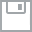
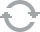
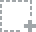
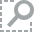
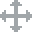
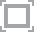
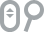
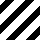
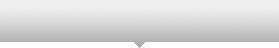
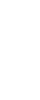
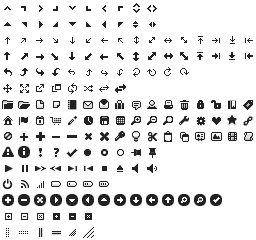
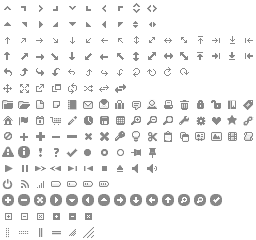
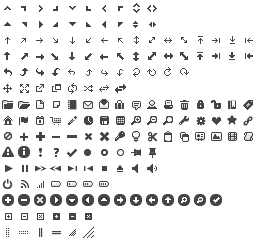
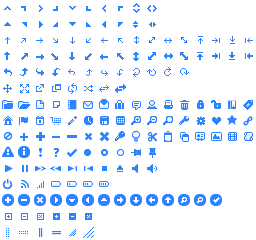
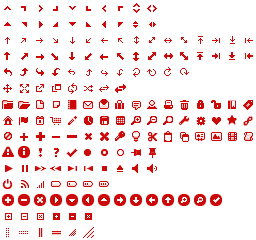
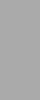
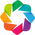
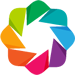

In [84]:
import pandas as pd
import numpy as np
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
from bokeh.plotting import figure,gridplot,show,output_notebook
from bokeh.models import Range1d
output_notebook()

%matplotlib inline

In [85]:
heart_data = pd.read_csv('/Users/anarra/Desktop/GeneralAssembly/DAT_SF_18/labs/data/heart_disease.csv')
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


#### Prepare and validate the data:

Investigate the data and check for missing values - we've used .info() before:

In [86]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null object
thal        303 non-null object
num         303 non-null int64
dtypes: float64(1), int64(11), object(2)
memory usage: 35.5+ KB


In [87]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,4.000000


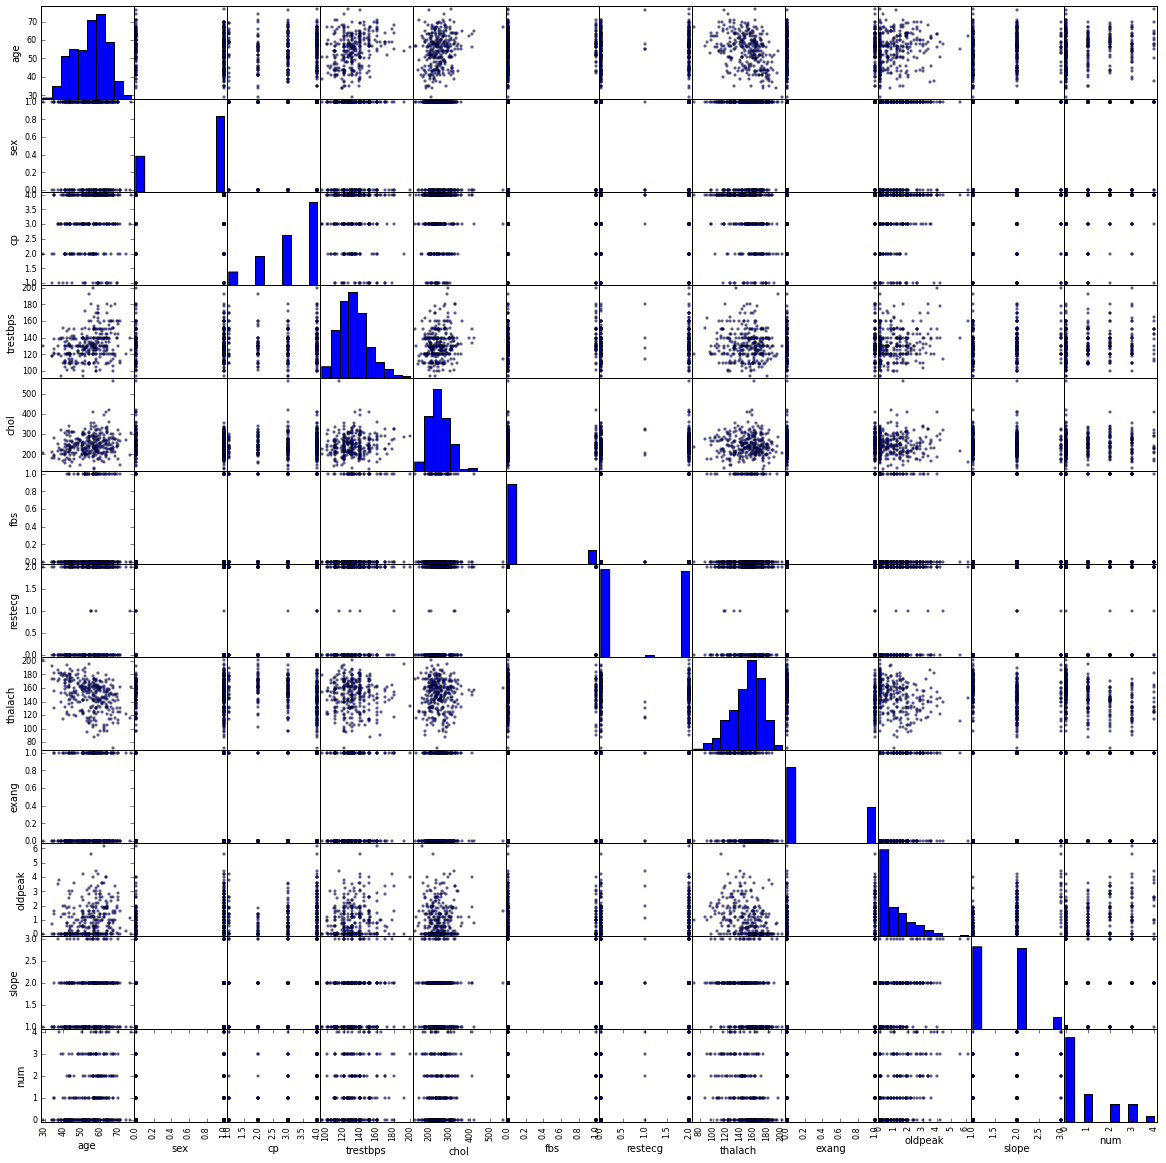

In [88]:
# _ = scatter_matrix(heart_data, figsize=(20,20))

In [89]:
heart_data.loc[heart_data['num'] > 0, 'num'] = 1

heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [91]:
heart_data.loc[heart_data['ca'] == '?', 'ca'] = np.nan
heart_data.ca

0        0
1        3
2        2
3        0
4        0
5        0
6        2
7        0
8        1
9        0
10       0
11       0
12       1
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       2
24       2
25       0
26       0
27       0
28       0
29       0
      ... 
273      0
274      2
275      0
276      1
277      0
278      1
279      0
280      1
281      0
282      1
283      0
284      1
285      3
286      2
287    NaN
288      0
289      0
290      0
291      0
292      0
293      2
294      0
295      0
296      2
297      0
298      0
299      2
300      1
301      1
302    NaN
Name: ca, dtype: object

In [97]:
mode = heart_data.ca.mode()
heart_data['ca'].fillna(value=mode.iget[1], inplace = True, axis = 0)
heart_data.ca

TypeError: 'instancemethod' object has no attribute '__getitem__'

In [55]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.461538
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499354
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


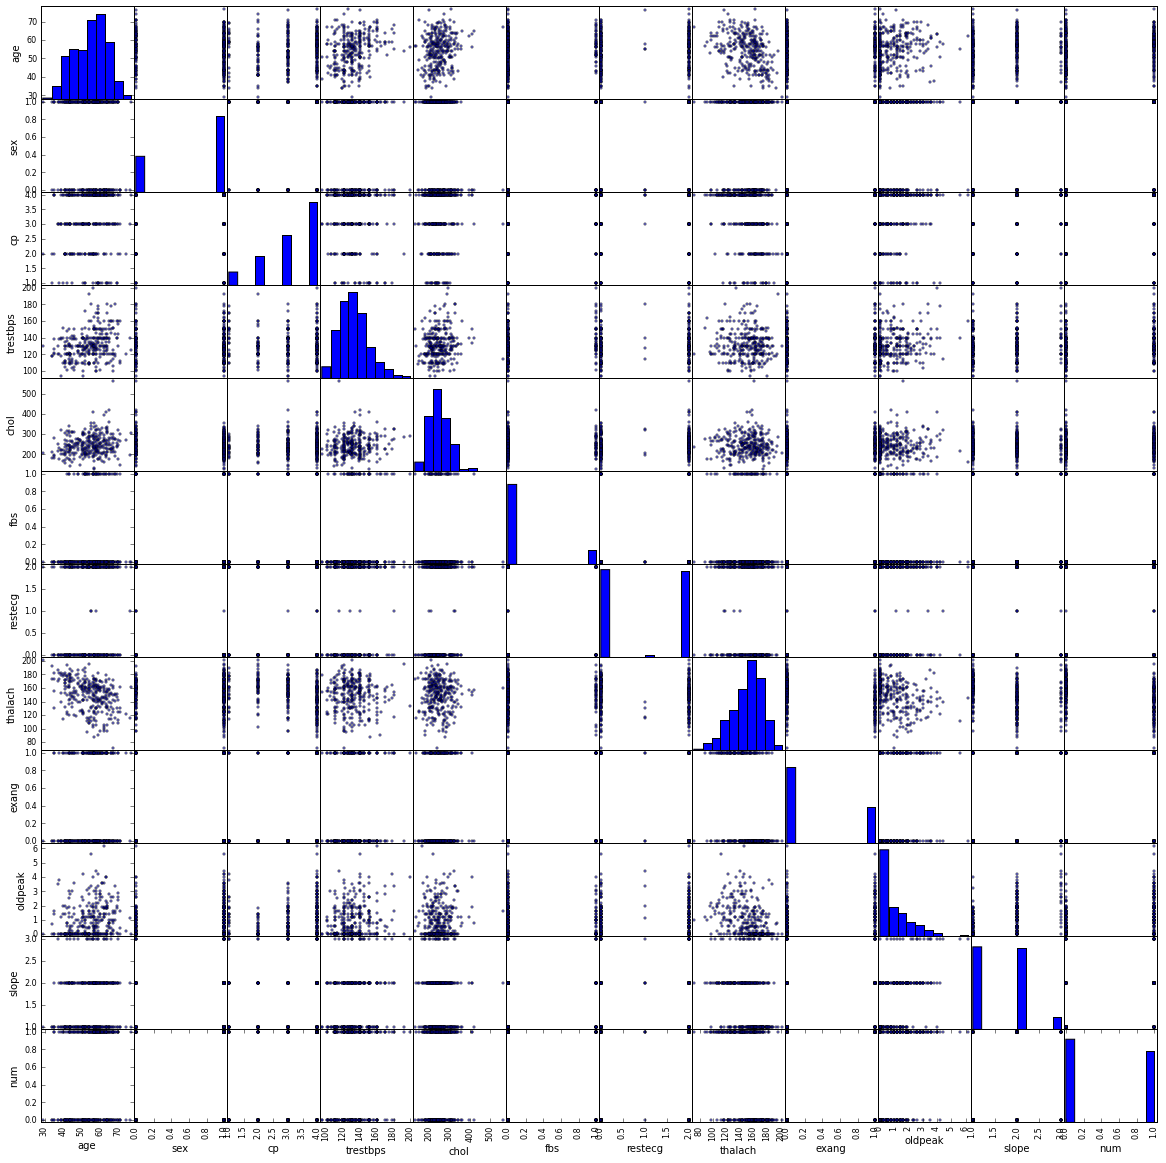

In [53]:
scat = scatter_matrix(heart_data, figsize=(20,20))

#### Clean the data to ensure it can be used in a random forest algorithm

#### Select Features and convert Target to Boolean Class for Heart Disease (i.e., values 1, 2, 3 and 4 all indicate heart disease)

#### Build the model and score with cross-validation

#### How important are the various features?

#### Plot Feature importances

#### Bonus: Repeat the classification with Support Vector Machine